In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

## Preprocess

In [2]:
file_path = "./HomeC.csv"
dataset = pd.read_csv(file_path, low_memory=False, index_col="time")

dataset.columns = [col.replace(' [kW]', '') for col in dataset.columns]

time_index = pd.DatetimeIndex(dataset.index)
dataset = dataset.set_index(time_index)
dataset.iloc[np.r_[0:5,-5:0]]

,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,...,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace
time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2.108589,0.004111,2.108589,0.000023,0.100391,0.063347,0.040204,0.136891,0.004294,0.009579,...,Clear,7.410,1023.260,13.21,0.00,284.0,0.0000,3.460,0.00,0.163738
2014-01-01 00:30:00,1.828066,0.004040,1.828066,0.000059,0.170241,0.063181,0.039184,0.146551,0.004210,0.009384,...,Clear,7.660,1023.265,11.64,0.00,284.0,0.0000,3.220,0.00,0.233421
2014-01-01 01:00:00,0.960618,0.004423,0.960618,0.000062,0.191079,0.129996,0.039070,0.063167,0.004314,0.009709,...,Clear,7.910,1023.270,10.07,0.00,284.0,0.0000,2.980,0.00,0.321076
2014-01-01 01:30:00,0.956158,0.004581,0.956158,0.000056,0.227550,0.274561,0.039026,0.005300,0.004406,0.009844,...,Clear,7.905,1023.795,9.25,0.00,271.0,0.0000,3.375,0.00,0.502111
2014-01-01 02:00:00,1.111968,0.004586,1.111968,0.000056,0.272573,0.376884,0.038959,0.005165,0.004447,0.009871,...,Clear,7.900,1024.320,8.43,0.00,258.0,0.0000,3.770,0.00,0.649457
2016-12-15 22:25:00,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,...,Flurries and Breezy,-0.650,1015.460,19.18,0.18,304.0,0.0008,1.090,0.01,0.727683
2016-12-15 22:26:00,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,...,Flurries and Breezy,-0.650,1015.460,19.18,0.18,304.0,0.0008,1.090,0.01,0.729050
2016-12-15 22:27:00,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,...,Flurries and Breezy,-0.650,1015.460,19.18,0.18,304.0,0.0008,1.090,0.01,1.060117
2016-12-15 22:28:00,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,...,Flurries and Breezy,-0.650,1015.460,19.18,0.18,304.0,0.0008,1.090,0.01,1.116033


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561194 entries, 2014-01-01 00:00:00 to 2016-12-15 22:29:00
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use                  561194 non-null  float64
 1   gen                  561194 non-null  float64
 2   House overall        561194 non-null  float64
 3   Dishwasher           561194 non-null  float64
 4   Furnace 1            561194 non-null  float64
 5   Furnace 2            561194 non-null  float64
 6   Home office          561194 non-null  float64
 7   Fridge               561194 non-null  float64
 8   Wine cellar          561194 non-null  float64
 9   Garage door          561194 non-null  float64
 10  Kitchen 12           561194 non-null  float64
 11  Kitchen 14           561194 non-null  float64
 12  Kitchen 38           561194 non-null  float64
 13  Barn                 561194 non-null  float64
 14  Well                 561194 non-nu

In [4]:
dataset.isna().sum()

use                    0
gen                    0
House overall          0
Dishwasher             0
Furnace 1              0
Furnace 2              0
Home office            0
Fridge                 0
Wine cellar            0
Garage door            0
Kitchen 12             0
Kitchen 14             0
Kitchen 38             0
Barn                   0
Well                   0
Microwave              0
Living room            0
Solar                  0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
Furnace                0
dtype: int64

## 取樣時間 (1min -> 30mins)

In [5]:
dataset = dataset.resample('30T').mean()
print("Shape of 15mins dataset: {} --> n_rows = {}, n_cols = {}".format(dataset.shape, dataset.shape[0],dataset.shape[1]))

Shape of 15mins dataset: (51837, 30) --> n_rows = 51837, n_cols = 30


In [6]:
dataset.dropna(inplace=True)

## Date encode to 環形時間

In [7]:
hours_in_day = 24
days_in_week = 7
months_in_year = 12
mins_in_hour = 60

dataset['sin_hr'] = np.sin(2*np.pi*dataset.index.hour/hours_in_day)
dataset['cos_hr'] = np.cos(2*np.pi*dataset.index.hour/hours_in_day)
dataset['sin_weekday'] = np.sin(2*np.pi*dataset.index.weekday/days_in_week)
dataset['cos_weekday'] = np.cos(2*np.pi*dataset.index.weekday/days_in_week)
dataset['sin_month'] = np.sin(2*np.pi*dataset.index.month/months_in_year)
dataset['cos_month'] = np.cos(2*np.pi*dataset.index.month/months_in_year)
# dataset['sin_min'] = np.sin(2*np.pi*dataset.index.minute/mins_in_hour)
# dataset['cos_min'] = np.cos(2*np.pi*dataset.index.minute/mins_in_hour)

dataset['is_holiday'] = dataset.index.weekday.map(lambda x: 1 if x>4 else 0)

dataset.iloc[np.r_[0:5, -5:0]]

,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,...,dewPoint,precipProbability,Furnace,sin_hr,cos_hr,sin_weekday,cos_weekday,sin_month,cos_month,is_holiday
time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2.108589,0.004111,2.108589,0.000023,0.100391,0.063347,0.040204,0.136891,0.004294,0.009579,...,3.460000,0.000000,0.163738,0.000000,1.000000,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 00:30:00,1.828066,0.004040,1.828066,0.000059,0.170241,0.063181,0.039184,0.146551,0.004210,0.009384,...,3.220000,0.000000,0.233421,0.000000,1.000000,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 01:00:00,0.960618,0.004423,0.960618,0.000062,0.191079,0.129996,0.039070,0.063167,0.004314,0.009709,...,2.980000,0.000000,0.321076,0.258819,0.965926,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 01:30:00,0.956158,0.004581,0.956158,0.000056,0.227550,0.274561,0.039026,0.005300,0.004406,0.009844,...,3.375000,0.000000,0.502111,0.258819,0.965926,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 02:00:00,1.111968,0.004586,1.111968,0.000056,0.272573,0.376884,0.038959,0.005165,0.004447,0.009871,...,3.770000,0.000000,0.649457,0.500000,0.866025,0.974928,-0.222521,5.000000e-01,0.866025,0
2016-12-15 20:00:00,1.275240,0.004136,1.275240,0.000086,0.341409,0.504738,0.041889,0.039443,0.123181,0.012707,...,4.740000,0.000000,0.846147,-0.866025,0.500000,0.433884,-0.900969,-2.449294e-16,1.000000,0
2016-12-15 20:30:00,1.245221,0.004147,1.245221,0.000114,0.340337,0.460352,0.041953,0.058838,0.123087,0.012778,...,2.340000,0.000000,0.800688,-0.866025,0.500000,0.433884,-0.900969,-2.449294e-16,1.000000,0
2016-12-15 21:00:00,1.105359,0.004157,1.105359,0.000073,0.306634,0.424716,0.041962,0.005071,0.122604,0.012830,...,1.097583,0.002417,0.731350,-0.707107,0.707107,0.433884,-0.900969,-2.449294e-16,1.000000,0
2016-12-15 21:30:00,1.095356,0.004172,1.095356,0.000098,0.238128,0.443923,0.041838,0.095056,0.008894,0.013084,...,1.092583,0.007417,0.682051,-0.707107,0.707107,0.433884,-0.900969,-2.449294e-16,1.000000,0


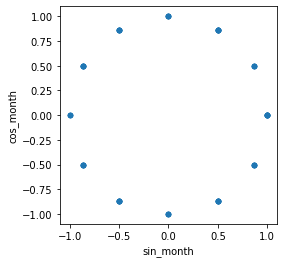

In [8]:
dataset.sample(100).plot.scatter('sin_month','cos_month').set_aspect('equal');

In [9]:
dataset.columns

Index(['use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1', 'Furnace 2',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12',
       'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room',
       'Solar', 'temperature', 'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'Furnace', 'sin_hr', 'cos_hr',
       'sin_weekday', 'cos_weekday', 'sin_month', 'cos_month', 'is_holiday'],
      dtype='object')

In [10]:
dataset["Furnace"].describe()

count    51831.000000
mean         0.237577
std          0.217396
min          0.000283
25%          0.085178
50%          0.105194
75%          0.344035
max          1.525672
Name: Furnace, dtype: float64

In [11]:
COL_WEATHER = ['temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover','windBearing', 'precipIntensity', 'dewPoint', 'precipProbability']
# COL_APPLIANCE = ['WaterHeater', 'Refrigerator', 'Microwave', 'Furnace', 'WaterHeater3', 'WaterHeater2', 'WaterHeater1', 'Kit_StoveWall', 'Dishwasher_Disposal', 'Kit_SinkWall', 'Washing_Machine', 'Dryer']
COL_APPLIANCE = ['Furnace']
# COL_DATE = ['sin_hr', 'cos_hr', 'sin_weekday', 'cos_weekday', 'sin_month', 'cos_month', 'sin_min', 'cos_min']
COL_DATE = ['sin_hr', 'cos_hr', 'sin_weekday', 'cos_weekday', 'sin_month', 'cos_month', 'is_holiday']
APPLIANCE = 'Furnace'

## Norm some weather features

In [12]:
COL_NORM = ['temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'windBearing', 'precipIntensity', 'dewPoint']
X = dataset.loc[:, COL_NORM]

In [13]:
ds_norm = MinMaxScaler().fit_transform(X)
dataset.loc[:, COL_NORM] = ds_norm

In [14]:
dataset.loc[:, COL_WEATHER]

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,
2014-01-01 00:00:00,0.309624,0.400000,1.000000,0.294961,0.672249,0.506554,0.000000,0.791086,0.000000,0.299091,0.000000
2014-01-01 00:30:00,0.304918,0.405882,1.000000,0.296845,0.672327,0.446029,0.000000,0.791086,0.000000,0.296750,0.000000
2014-01-01 01:00:00,0.300212,0.411765,1.000000,0.298728,0.672406,0.385505,0.000000,0.791086,0.000000,0.294408,0.000000
2014-01-01 01:30:00,0.295836,0.435294,1.000000,0.298690,0.680623,0.353894,0.000000,0.754875,0.000000,0.298262,0.000000
2014-01-01 02:00:00,0.291459,0.458824,1.000000,0.298652,0.688840,0.322282,0.000000,0.718663,0.000000,0.302116,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-15 20:00:00,0.280704,0.518824,0.676827,0.249690,0.519284,0.686106,0.110000,0.756708,0.000000,0.311580,0.000000
2016-12-15 20:30:00,0.280845,0.448235,0.816951,0.249840,0.524371,0.685913,0.110000,0.772029,0.000000,0.288163,0.000000
2016-12-15 21:00:00,0.278211,0.420294,0.897846,0.246132,0.532598,0.698111,0.126917,0.796100,0.000584,0.276041,0.002417


## KNN by weather and date


In [15]:
from sklearn.neighbors import NearestNeighbors 

In [16]:
# training
neighs = NearestNeighbors(n_neighbors=200, algorithm='auto', n_jobs=-1).fit(dataset.loc[:, COL_WEATHER+COL_DATE])

In [17]:
# get neighbors
target_neighbors = neighs.kneighbors(dataset.loc[:, COL_WEATHER+COL_DATE], return_distance=False)

In [18]:
target_neighbors[0]

array([    0,     1, 35948, 35949, 18479, 18478, 35613, 35612,  1344,
        1345, 35276, 35277, 18815, 18814, 17806, 17807,  1008,  1009,
         337,   336, 18142, 18143,   673, 35951, 35950,     2,     3,
         672, 35658, 18481, 18480, 35659,    47, 35615, 35614,    46,
         383, 35995, 35322, 35994,  1347, 18525,   382, 18524, 36284,
        1346, 35323, 18188, 36285,  1390,  1391, 18189, 18860, 35278,
       18817, 18816, 18861, 35279, 36330, 17809, 36331, 17808,   338,
        1010,   339,  1011,  1054,  1055, 18144,   675, 18145,   718,
         719,   674, 17852, 17853, 36287, 36286, 35952, 35953, 19487,
       19486,     4,     5, 35656, 18483, 35617, 35657, 18482, 35616,
        2688,   380,    45, 18858, 35321,   381,  2689,    44, 18522,
       17471, 35320, 35993, 35992, 18523,  2352,  1388, 18859, 20158,
       20159, 17470,  1349,  1348, 18186, 18187,  1389,  2353, 18819,
       18818, 36957, 36956, 35281, 35280, 17811, 36329, 17810, 36328,
        1681,  1680,

In [19]:
get_tolerable_power = lambda x: dataset["Furnace"].iloc[x].quantile(.25)
tolerable_power_df = pd.DataFrame([get_tolerable_power(row) for row in target_neighbors], index=dataset.index, columns=["Furnace"])

In [20]:
tolerable_power_df

,Furnace
time,
2014-01-01 00:00:00,0.282984
2014-01-01 00:30:00,0.282984
2014-01-01 01:00:00,0.390498
2014-01-01 01:30:00,0.393748
2014-01-01 02:00:00,0.447100
...,...
2016-12-15 20:00:00,0.281440
2016-12-15 20:30:00,0.281440
2016-12-15 21:00:00,0.167208


## 原始用電 v.s. 容忍值

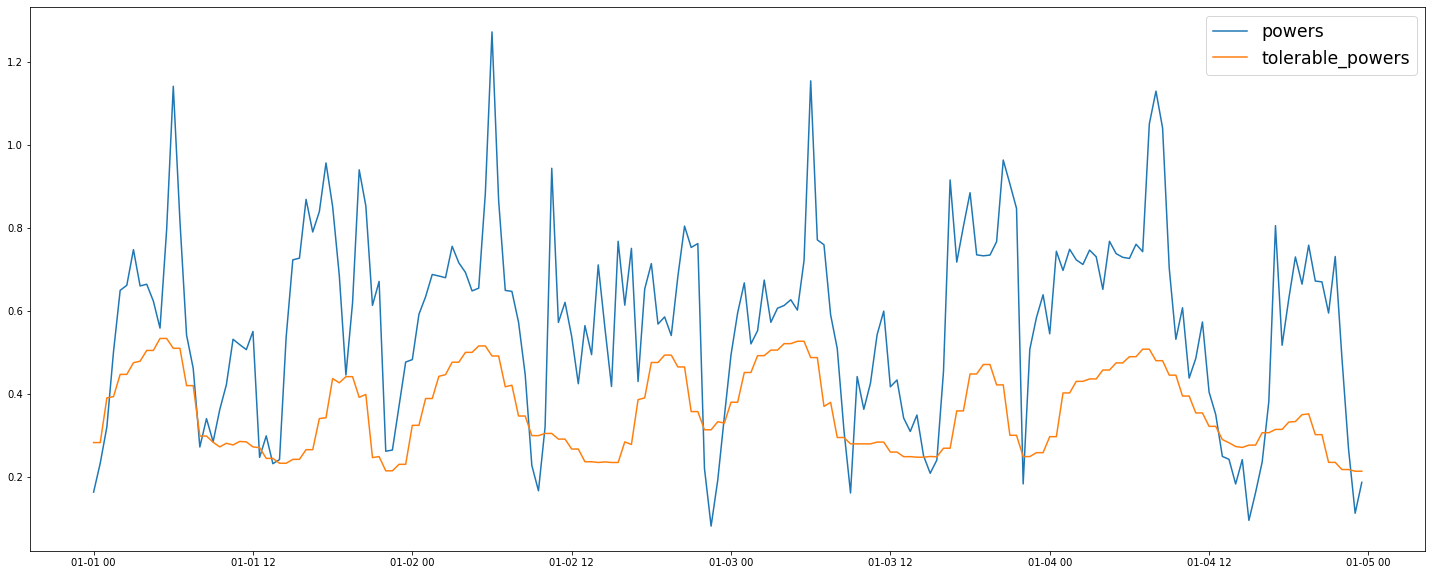

In [22]:
plt.figure(figsize=(25,10))
plt.plot(dataset['Furnace'].iloc[:96*2])
plt.plot(tolerable_power_df['Furnace'].iloc[:96*2])
# plt.plot(dataset['temperature'].iloc[:24])
plt.legend(['powers', 'tolerable_powers', 'temperature'], fontsize='xx-large')
plt.show()

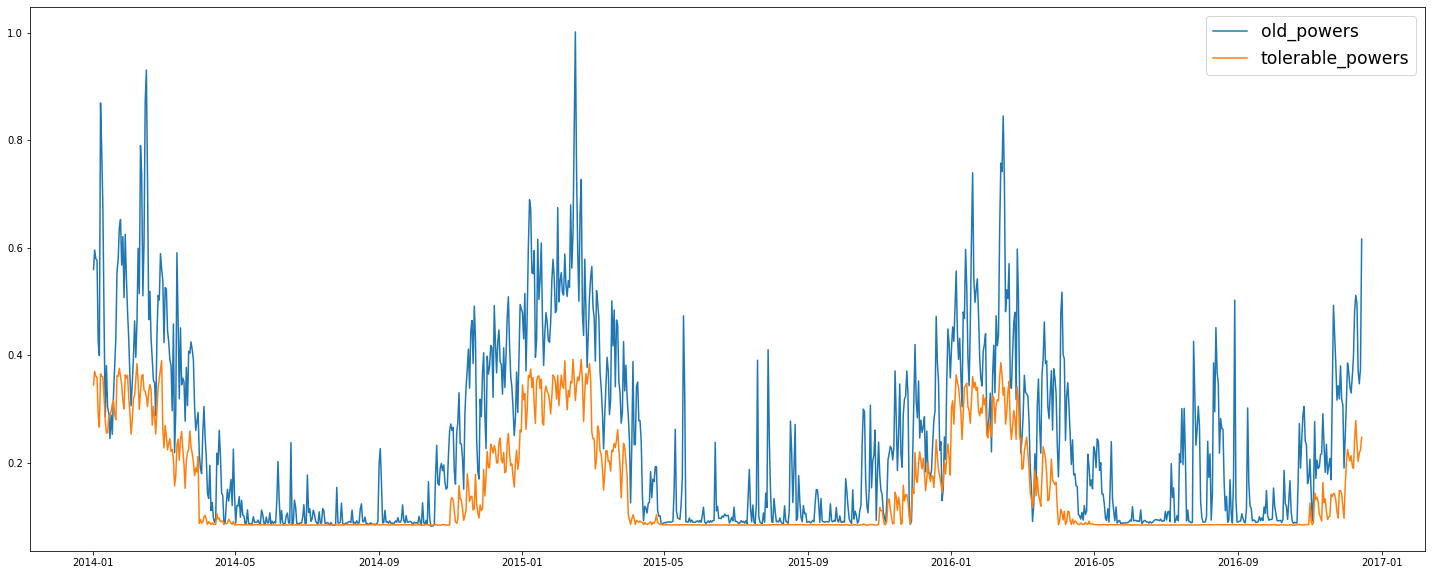

In [23]:
plt.figure(figsize=(25,10))
plt.plot(dataset['Furnace'].resample('D').mean())
plt.plot(tolerable_power_df['Furnace'].resample('D').mean())
# plt.plot(dataset['temperature'].resample('D').mean())
plt.legend(['old_powers', 'tolerable_powers', 'temperature'], fontsize='xx-large')
plt.show()

In [24]:
# 容忍值
tolerable_power_df['Furnace'].describe()

count    51831.000000
mean         0.145769
std          0.104934
min          0.082852
25%          0.084270
50%          0.084998
75%          0.177412
max          0.576496
Name: Furnace, dtype: float64

In [25]:
# 原始用電
dataset['Furnace'].describe()

count    51831.000000
mean         0.237577
std          0.217396
min          0.000283
25%          0.085178
50%          0.105194
75%          0.344035
max          1.525672
Name: Furnace, dtype: float64

## Filter closed furnace (<0.09)

In [27]:
dataset.drop(dataset.loc[dataset.loc[:, 'Furnace'] < 0.09, :].index, inplace=True)

In [28]:
tolerable_power_df.loc[tolerable_power_df.loc[:, 'Furnace'] < 0.09, 'Furnace'] = 0

In [29]:
dataset

,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,...,dewPoint,precipProbability,Furnace,sin_hr,cos_hr,sin_weekday,cos_weekday,sin_month,cos_month,is_holiday
time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2.108589,0.004111,2.108589,0.000023,0.100391,0.063347,0.040204,0.136891,0.004294,0.009579,...,0.299091,0.000000,0.163738,0.000000,1.000000,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 00:30:00,1.828066,0.004040,1.828066,0.000059,0.170241,0.063181,0.039184,0.146551,0.004210,0.009384,...,0.296750,0.000000,0.233421,0.000000,1.000000,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 01:00:00,0.960618,0.004423,0.960618,0.000062,0.191079,0.129996,0.039070,0.063167,0.004314,0.009709,...,0.294408,0.000000,0.321076,0.258819,0.965926,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 01:30:00,0.956158,0.004581,0.956158,0.000056,0.227550,0.274561,0.039026,0.005300,0.004406,0.009844,...,0.298262,0.000000,0.502111,0.258819,0.965926,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 02:00:00,1.111968,0.004586,1.111968,0.000056,0.272573,0.376884,0.038959,0.005165,0.004447,0.009871,...,0.302116,0.000000,0.649457,0.500000,0.866025,0.974928,-0.222521,5.000000e-01,0.866025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-15 20:00:00,1.275240,0.004136,1.275240,0.000086,0.341409,0.504738,0.041889,0.039443,0.123181,0.012707,...,0.311580,0.000000,0.846147,-0.866025,0.500000,0.433884,-0.900969,-2.449294e-16,1.000000,0
2016-12-15 20:30:00,1.245221,0.004147,1.245221,0.000114,0.340337,0.460352,0.041953,0.058838,0.123087,0.012778,...,0.288163,0.000000,0.800688,-0.866025,0.500000,0.433884,-0.900969,-2.449294e-16,1.000000,0
2016-12-15 21:00:00,1.105359,0.004157,1.105359,0.000073,0.306634,0.424716,0.041962,0.005071,0.122604,0.012830,...,0.276041,0.002417,0.731350,-0.707107,0.707107,0.433884,-0.900969,-2.449294e-16,1.000000,0


## DataFrame to CSV

In [30]:
dataset.to_csv('C_features.csv', columns=COL_WEATHER+COL_DATE+["Furnace"])

In [32]:
tolerable_power_df.to_csv('C_furnace_tolerable_power.csv')